No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1767.6 ns
Fit: a1=0.823, a2=0.107, a3=0.024, t1=3.287, t2=22.829, t3=411.057, c=0.001
R2: 0.9941, R2_log: 0.9682


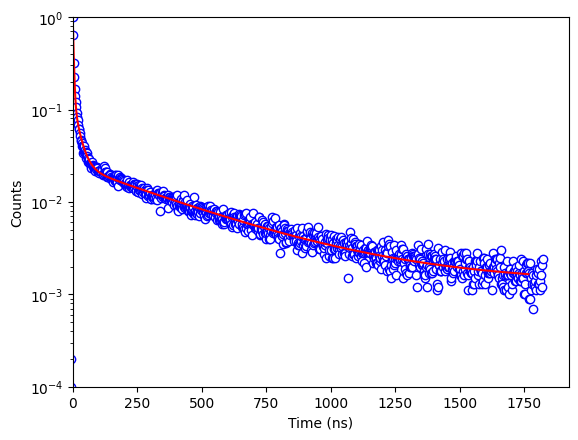

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1455.1 ns
Fit: a1=0.554, a2=0.142, a3=0.066, t1=6.570, t2=61.485, t3=385.827, c=0.000
R2: 0.9728, R2_log: 0.9886


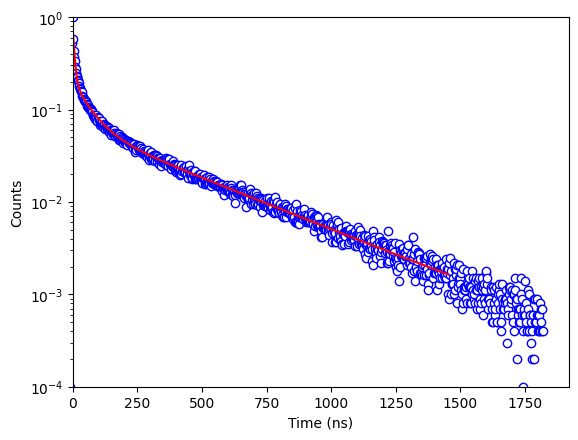

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1347.7 ns
Fit: a1=0.685, a2=0.114, a3=0.037, t1=3.333, t2=35.208, t3=430.147, c=0.000
R2: 0.9775, R2_log: 0.9839


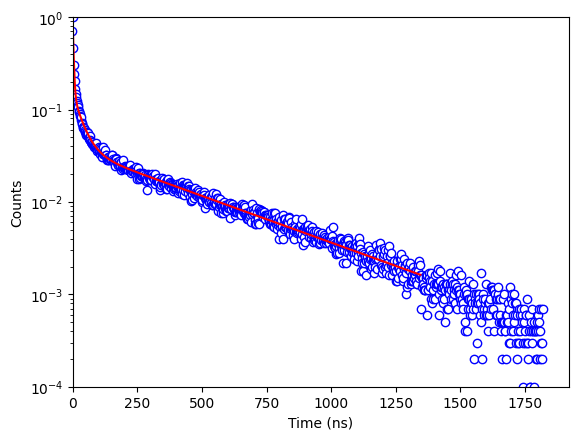

930.7 ns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Fit: a1=0.552, a2=0.151, a3=0.062, t1=4.915, t2=45.901, t3=292.890, c=0.003
R2: 0.9812, R2_log: 0.9900


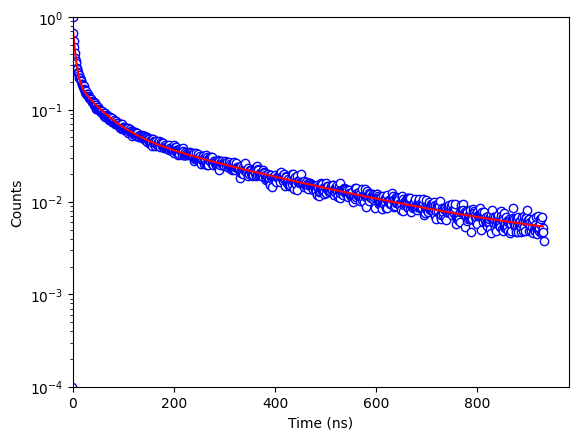

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1363.3 ns
Fit: a1=0.535, a2=0.167, a3=0.077, t1=9.132, t2=71.199, t3=314.085, c=0.001
R2: 0.9827, R2_log: 0.9919


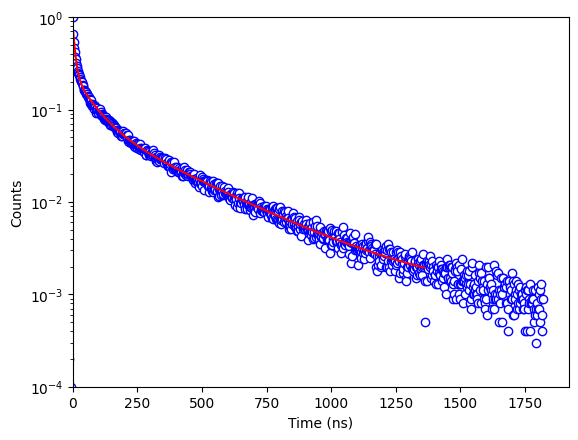

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


850.6 ns
Fit: a1=0.546, a2=0.138, a3=0.050, t1=5.303, t2=44.810, t3=235.846, c=0.003
R2: 0.9745, R2_log: 0.9892


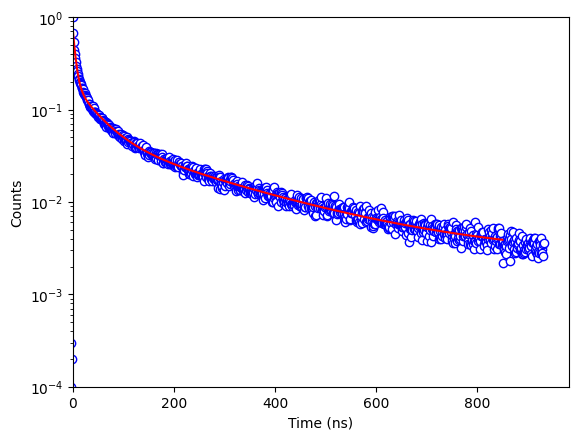

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


561.5 ns
Fit: a1=0.763, a2=0.079, a3=0.021, t1=1.484, t2=15.976, t3=135.858, c=0.001
R2: 0.9833, R2_log: 0.9716


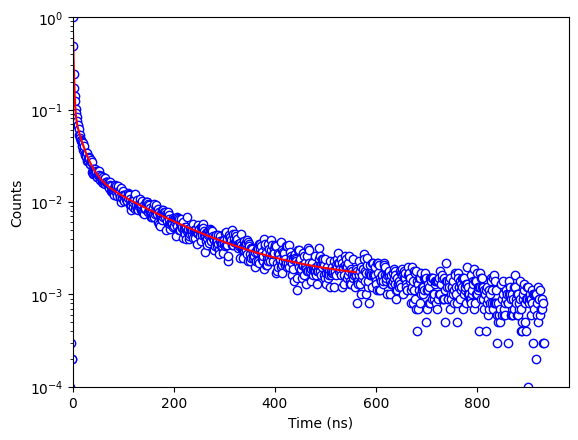

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1052.7 ns
Fit: a1=0.542, a2=0.200, a3=0.051, t1=10.909, t2=72.274, t3=289.072, c=0.000
R2: 0.9855, R2_log: 0.9897


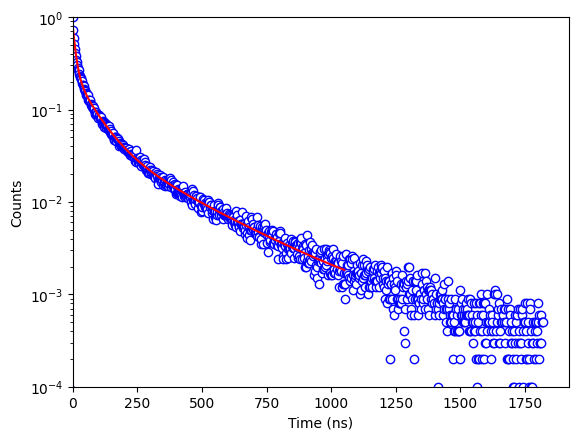

794.9 ns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Fit: a1=0.548, a2=0.228, a3=0.100, t1=6.201, t2=41.339, t3=149.543, c=0.001
R2: 0.9932, R2_log: 0.9915


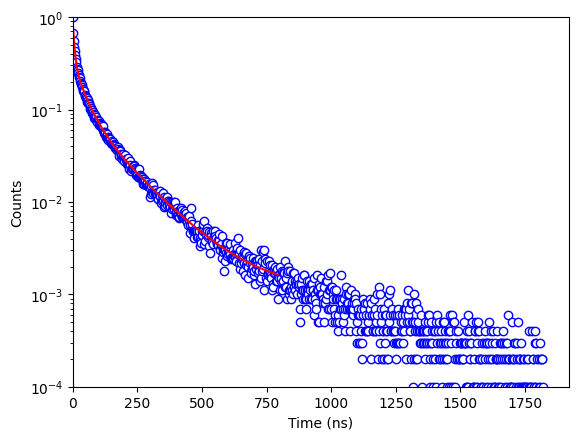

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


478.5 ns
Fit: a1=0.628, a2=0.148, a3=0.041, t1=3.153, t2=24.040, t3=114.535, c=0.001
R2: 0.9826, R2_log: 0.9864


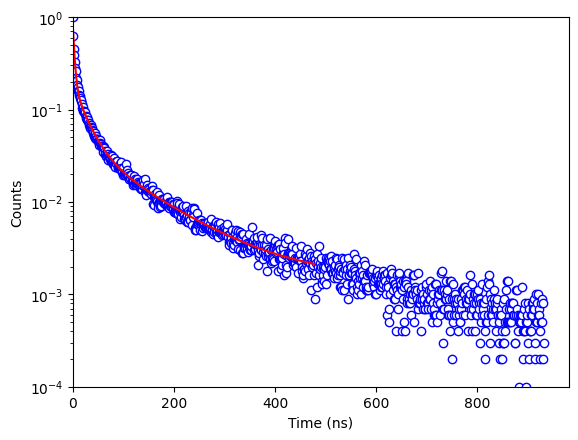

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


764.6 ns
Fit: a1=0.553, a2=0.173, a3=0.092, t1=4.926, t2=43.475, t3=244.230, c=0.004
R2: 0.9899, R2_log: 0.9940


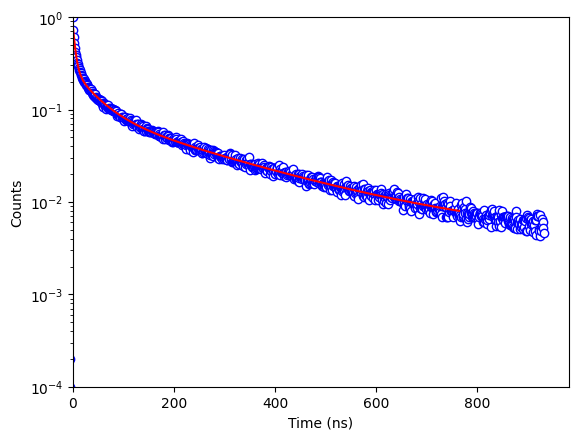

482.4 ns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Fit: a1=0.596, a2=0.142, a3=0.031, t1=3.447, t2=24.488, t3=122.659, c=0.001
R2: 0.9721, R2_log: 0.9854


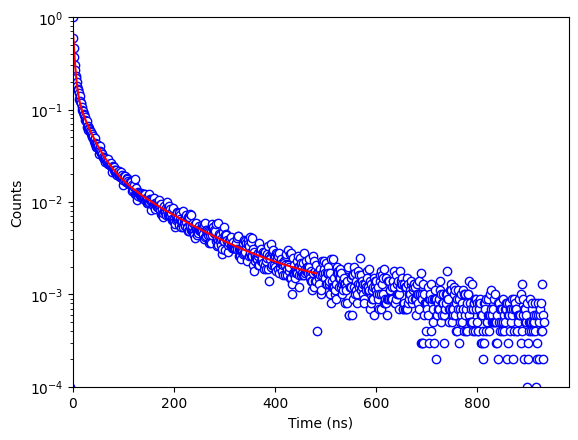

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import math

path = "/Users/yukiharuta/Master/05_UVic/01_Project/04_Perovskite-FCG/14_TRPL/240419_for-revision.xlsx"

def tri_exponential_decay(t,A1,A2,A3,tau1,tau2,tau3, c):
    return A1 * np.exp((-1)*t/tau1) + A2 * np.exp((-1)*t/tau2) + A3 * np.exp((-1)*t/tau3) + c

def process_data(X,Y,normalize=True):
    # find on-time
    on_index = Y.index(max(Y))
    offset_time = X[on_index]
    X = [x-offset_time for x in X]
    if normalize:
        # normalize
        Y = [(y-min(Y))/max(Y) for y in Y]
    return X, Y, on_index

def TRPL_fit(X, Y, label):
    # Make On time to be 0 ns and Normalize Y
    X, Y, on_index = process_data(X, Y, normalize=True)

    # Cut time for fitting
    power = -3
    threshold = 10 ** power
    while True:
        try:
            cut_index = next(y[0] for y in enumerate(Y[on_index:]) if y[1] < threshold) + on_index
            break
        except:
            power += 0.2
            threshold = 10 ** power
    cut_time = X[cut_index]

    # cut_time = 700
    # cut_index = next(x[0] for x in enumerate(X) if x[1] < cut_time)
    print(f'{cut_time:.1f} ns')

    # Data used for fitting
    X_for_fit = X[on_index:cut_index]
    Y_for_fit = Y[on_index:cut_index]
    # Prepare log for fitting
    log_Y_for_fit = np.log(Y_for_fit)

    # start from tri exponential
    def log_fit(t, A1, A2, A3, tau1, tau2, tau3, c):
        return np.log(tri_exponential_decay(t, A1, A2, A3, tau1, tau2, tau3, c))
    
    # Initial guess for the parameters
    initial_guess = [0.7, 0.2, 0.1, 5, 50, 100, 0]
    # Bounds for the parameters (all parameters are positive)
    bounds = (0, np.inf)  # All parameters must be greater than 0

    # Fit the tri-exponential function to the data with bounds
    popt, _ = curve_fit(log_fit, X_for_fit, log_Y_for_fit, p0=initial_guess, bounds=bounds)

    # Calculate R-squared value
    Y_fit = [np.exp(log_fit(x, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5], popt[6])) for x in X_for_fit]
    r2 = r2_score(Y_for_fit, Y_fit)
    r2_log = r2_score(log_Y_for_fit, np.log(Y_fit))

    results = list(popt)

    print('Fit: a1=%5.3f, a2=%5.3f, a3=%5.3f, t1=%5.3f, t2=%5.3f, t3=%5.3f, c=%5.3f' % tuple(popt))
    print(f'R2: {r2:.4f}, R2_log: {r2_log:.4f}')
    
    plt.scatter(X, Y, c='white', ec='blue')
    plt.plot(X_for_fit, Y_fit, c='red',label=label)
    plt.ylabel('Counts')
    plt.xlabel('Time (ns)')
    plt.ylim(1e-4, 1)
    plt.xlim(0, None)
    plt.yscale('log')
    plt.legend(frameon=False)
    plt.show()

    # round values
    cut_time = round(cut_time,1)
    results1 = [round(n,4) for n in results[:3]] # A1, A2, A3
    results2 = [round(n,2) for n in results[3:6]] # t1, t2, t3
    results3 = [round(results[-1],4)] # c
    results = results1 + results2 + results3
    r2 = round(r2,4)
    r2_log = round(r2_log,4)
    return X, Y, cut_time, results, r2, r2_log


df = pd.read_excel(path,skiprows=1)

data_list = []

for i in range(12):
    X = df.iloc[:,0+(i*2)].to_list()
    Y = df.iloc[:,1+(i*2)].to_list()
    X = [x for x in X if not math.isnan(x)]
    Y = [y for y in Y if not math.isnan(y)]
    data_list.append([X,Y])

result_list = []
for data in data_list:
    X, Y = data[0], data[1]
    X, Y, cut_time, results, r2, r2_log = TRPL_fit(X, Y, label='')
    result_list.append([X, Y, cut_time, results, r2, r2_log])

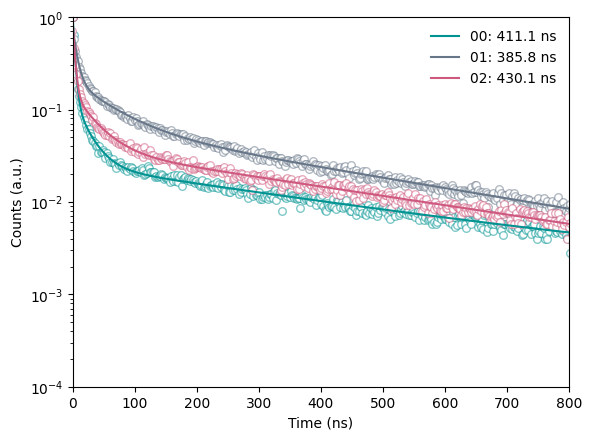

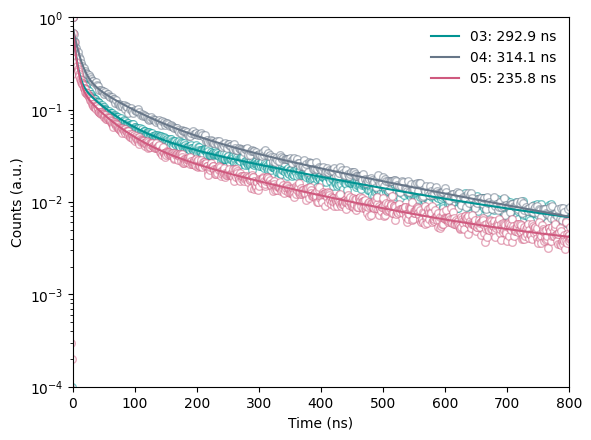

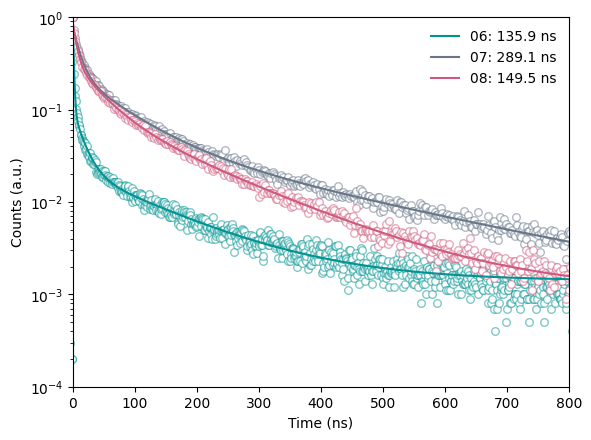

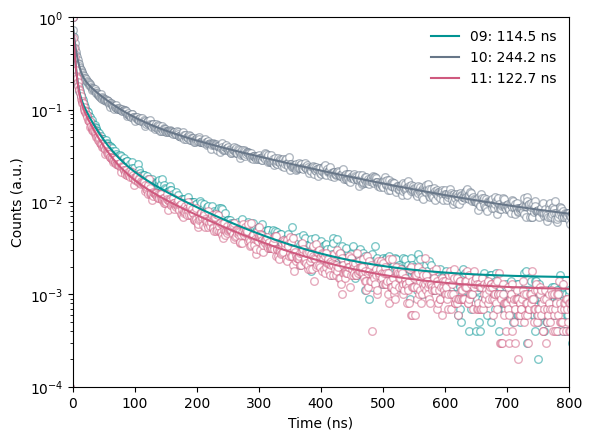

In [2]:
plot_ids = np.arange(0,12,1)

color_list = ['#009392', '#677688', '#CF597E']

for i in plot_ids:
    X = result_list[i][0]
    Y = result_list[i][1]
    a1, a2, a3, t1, t2, t3, c = result_list[i][3]
    Y_fit = [tri_exponential_decay(x,a1,a2, a3, t1, t2, t3, c) for x in X]
    plt.scatter(X,Y,ec=f'{color_list[i%3]}80',c='white',s=30)
    plt.plot(X,Y_fit,label=f'{i:02}: {t3:.1f} ns',color=color_list[i%3])

    if i%3 == 2:
        plt.xlabel('Time (ns)')
        plt.ylabel('Counts (a.u.)')
        plt.yscale('log')
        plt.xlim(0,800)
        plt.ylim(1e-4,1)
        plt.legend(frameon=False)
        plt.show()

# plt.show()

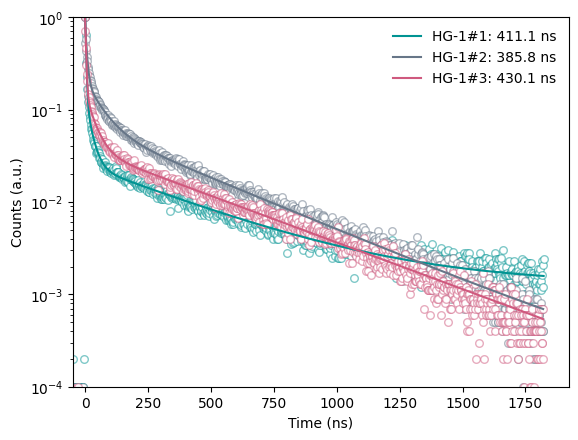

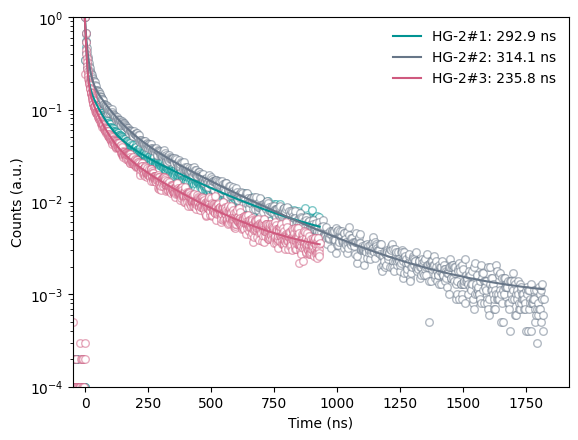

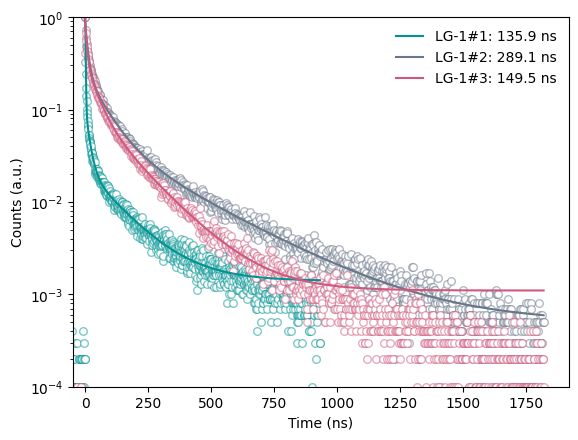

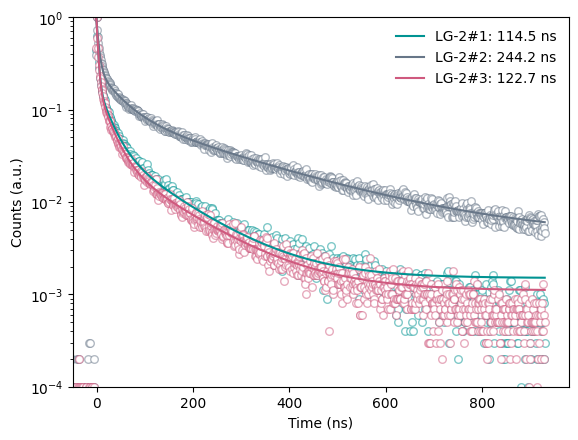

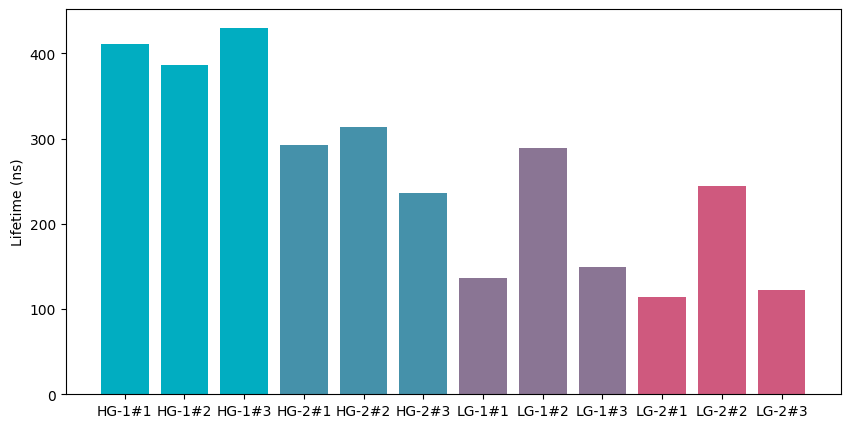

In [3]:
plot_ids = np.arange(0,12,1)

color_list = ['#009392', '#677688', '#CF597E']
#HG-1: 230925_B, HG-2: 240228_A, LG-1: 240304_AY1, LG-2: 240304_AY2
x_labels = ['HG-1#1','HG-1#2','HG-1#3','HG-2#1','HG-2#2','HG-2#3','LG-1#1','LG-1#2','LG-1#3','LG-2#1','LG-2#2','LG-2#3']
sample_colors = ['#01ADC1', '#4591AA', '#8A7594', '#CF597E']
bar_colors = []
for color in sample_colors:
    bar_colors.append(color)
    bar_colors.append(color)
    bar_colors.append(color)
y_values = [] # add t3
for i in plot_ids:
    X = result_list[i][0]
    Y = result_list[i][1]
    a1, a2, a3, t1, t2, t3, c = result_list[i][3]
    y_values.append(t3)
    Y_fit = [tri_exponential_decay(x,a1,a2, a3, t1, t2, t3, c) for x in X]
    plt.scatter(X,Y,ec=f'{color_list[i%3]}80',c='white',s=30)
    plt.plot(X,Y_fit,label=f'{x_labels[i]}: {t3:.1f} ns',color=color_list[i%3])

    if i%3 == 2:
        plt.xlabel('Time (ns)')
        plt.ylabel('Counts (a.u.)')
        plt.yscale('log')
        plt.xlim(-50,None)
        plt.ylim(1e-4,1)
        plt.legend(frameon=False)
        plt.show()

# 棒グラフを作成します
plt.figure(figsize=(10, 5))
plt.bar(x_labels, y_values, color=bar_colors)

# タイトルと軸のラベルを追加します
plt.ylabel('Lifetime (ns)')

# グラフを表示します
plt.show()

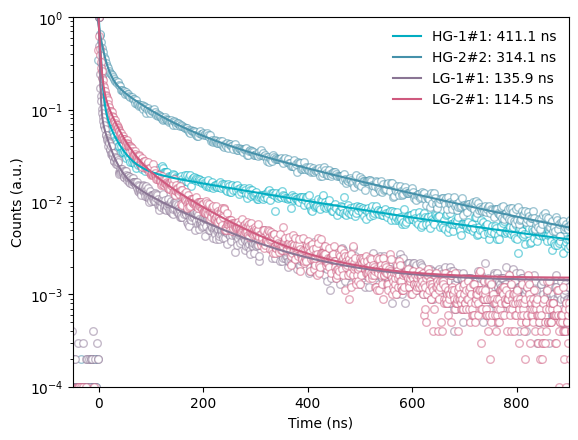

In [6]:
plot_ids = [0,4,6,9]

#HG-1: 230925_B, HG-2: 240228_A, LG-1: 240304_AY1, LG-2: 240304_AY2
x_labels = ['HG-1#1','HG-1#2','HG-1#3','HG-2#1','HG-2#2','HG-2#3','LG-1#1','LG-1#2','LG-1#3','LG-2#1','LG-2#2','LG-2#3']
sample_colors = ['#01ADC1', '#4591AA', '#8A7594', '#CF597E']

for i in plot_ids:
    X = result_list[i][0]
    Y = result_list[i][1]
    a1, a2, a3, t1, t2, t3, c = result_list[i][3]
    y_values.append(t3)
    Y_fit = [tri_exponential_decay(x,a1,a2, a3, t1, t2, t3, c) for x in X]
    plt.scatter(X,Y,ec=f'{sample_colors[i//3]}80',c='white',s=30)
    plt.plot(X,Y_fit,label=f'{x_labels[i]}: {t3:.1f} ns',color=sample_colors[i//3])

plt.xlabel('Time (ns)')
plt.ylabel('Counts (a.u.)')
plt.yscale('log')
plt.xlim(-50,900)
# plt.xlim(-50,1800)
plt.ylim(1e-4,1)
plt.legend(frameon=False)
plt.show()